In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.shape

(31780, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31780 entries, 0 to 31779
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    31780 non-null  int64  
 1   V1      31780 non-null  float64
 2   V2      31780 non-null  float64
 3   V3      31780 non-null  float64
 4   V4      31780 non-null  float64
 5   V5      31780 non-null  float64
 6   V6      31780 non-null  float64
 7   V7      31779 non-null  float64
 8   V8      31779 non-null  float64
 9   V9      31779 non-null  float64
 10  V10     31779 non-null  float64
 11  V11     31779 non-null  float64
 12  V12     31779 non-null  float64
 13  V13     31779 non-null  float64
 14  V14     31779 non-null  float64
 15  V15     31779 non-null  float64
 16  V16     31779 non-null  float64
 17  V17     31779 non-null  float64
 18  V18     31779 non-null  float64
 19  V19     31779 non-null  float64
 20  V20     31779 non-null  float64
 21  V21     31779 non-null  float64
 22

In [6]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,1
V8,1
V9,1


In [7]:
df.duplicated().sum()

129

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:

df['Class'].value_counts()

,count
Class,
0.0,31548
1.0,102


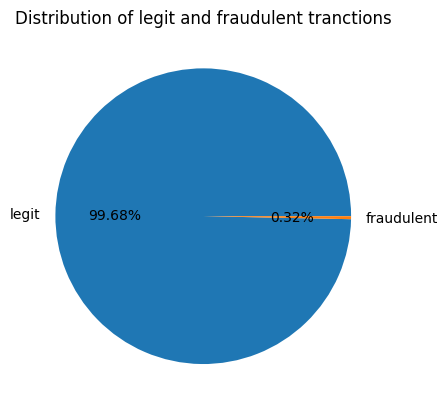

In [11]:
df['Class'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['legit','fraudulent'])
plt.ylabel("")
plt.title("Distribution of legit and fraudulent tranctions")
plt.show()

In [12]:

fraud = df[df['Class']==1]
legit = df[df['Class']==0]

In [13]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31774,36510,-2.889750,-1.494407,-1.212812,-3.022994,-3.349675,0.976597,2.876988,0.434818,-1.233745,...,-0.117475,-0.373331,0.191447,-0.283737,0.635904,-0.020466,-0.030723,-0.451989,803.00,0.0
31775,36510,1.497714,-0.874208,0.004261,-1.537368,-1.044513,-0.733905,-0.644635,-0.186510,-2.380495,...,-0.527761,-1.248016,0.145825,-0.061193,0.250252,-0.526898,0.003761,0.007950,24.90,0.0
31776,36512,-0.407854,0.940336,1.533733,-0.018123,-0.219400,-0.934602,0.597172,0.024610,-0.151850,...,-0.247570,-0.725830,-0.006221,0.322366,-0.249413,0.076587,0.255380,0.117340,1.79,0.0
31777,36513,-0.434226,-3.705556,0.194223,0.139216,-2.066818,1.220137,-0.278115,0.281452,-0.161302,...,0.620431,0.040315,-0.690176,-0.226844,-0.123369,-0.291412,-0.080514,0.155457,861.12,0.0


In [14]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30398,35906,-3.519030,4.140867,-3.628202,5.505672,-4.057463,-0.905945,-6.652031,2.634524,-4.679402,...,1.582556,0.778710,-0.135707,-0.004278,0.032706,0.362014,0.900925,0.554897,9.13,1.0
30442,35926,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,...,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,4.56,1.0
30473,35942,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,...,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46,1.0
30496,35953,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,-5.416284,...,1.194888,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,111.70,1.0


In [15]:
legit.Amount.describe()

,Amount
count,31548.000000
mean,81.282272
std,223.434175
min,0.000000
25%,6.907500
50%,20.130000
75%,73.900000
max,7879.420000


In [16]:
fraud.Amount.describe()

,Amount
count,102.000000
mean,91.237451
std,248.270971
min,0.000000
25%,1.000000
50%,3.440000
75%,99.990000
max,1809.680000


In [17]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,22335.415335,-0.185831,0.082348,0.759557,0.190239,-0.191962,0.094040,-0.094703,0.019986,0.323025,...,0.042736,-0.036934,-0.117529,-0.039753,0.009329,0.133527,0.022851,0.011665,0.003332,81.282272
1.0,20334.872549,-7.761095,5.946853,-11.035230,5.926171,-5.529543,-2.295415,-7.767215,3.904551,-2.997290,...,0.679987,0.641900,-0.352131,-0.317568,-0.241053,0.314412,0.177056,0.811372,0.118708,91.237451


In [18]:
legit_sample = legit.sample(n=473)

In [19]:

new_df = pd.concat([legit_sample,fraud],axis=0)

In [20]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13140,23071,1.185983,-0.299135,1.018287,-0.565196,-0.935073,-0.297523,-0.710116,0.006404,3.059797,...,-0.125481,0.159228,-0.007221,0.045117,0.409528,-0.697562,0.083143,0.027950,11.85,0.0
4418,3767,-0.310197,-0.006544,0.768549,-1.935041,2.200873,3.483599,-0.488789,0.612529,-0.306156,...,-0.279338,-0.727534,-0.172767,0.923539,0.176872,-0.399629,-0.124893,-0.156279,7.09,0.0
22030,31993,-0.381271,0.985189,1.217419,-0.218339,0.378739,-0.446117,0.656992,-0.009811,-0.336486,...,-0.280025,-0.750255,-0.119785,-0.473978,-0.080252,0.123200,0.263109,0.113292,1.98,0.0
4944,4492,0.813421,-0.748426,1.340310,0.640720,-1.525057,-0.637926,-0.455720,-0.174873,2.179720,...,-0.107095,-0.260154,-0.041856,0.967640,-0.021689,0.895382,-0.090244,0.050600,200.00,0.0
9818,14506,1.145304,-0.153505,0.934851,0.217603,-0.765481,-0.183295,-0.669441,0.116748,1.587171,...,0.016600,0.264969,0.036795,0.217938,0.047980,1.033725,-0.081975,-0.007535,15.95,0.0


In [21]:
new_df.shape

(575, 31)

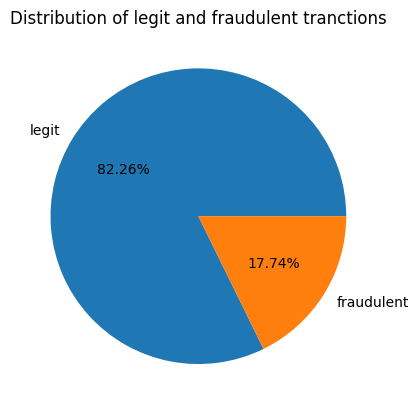

In [22]:
new_df['Class'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['legit','fraudulent'])
plt.ylabel("")
plt.title("Distribution of legit and fraudulent tranctions")
plt.show()

In [23]:

df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,22335.415335,-0.185831,0.082348,0.759557,0.190239,-0.191962,0.094040,-0.094703,0.019986,0.323025,...,0.042736,-0.036934,-0.117529,-0.039753,0.009329,0.133527,0.022851,0.011665,0.003332,81.282272
1.0,20334.872549,-7.761095,5.946853,-11.035230,5.926171,-5.529543,-2.295415,-7.767215,3.904551,-2.997290,...,0.679987,0.641900,-0.352131,-0.317568,-0.241053,0.314412,0.177056,0.811372,0.118708,91.237451


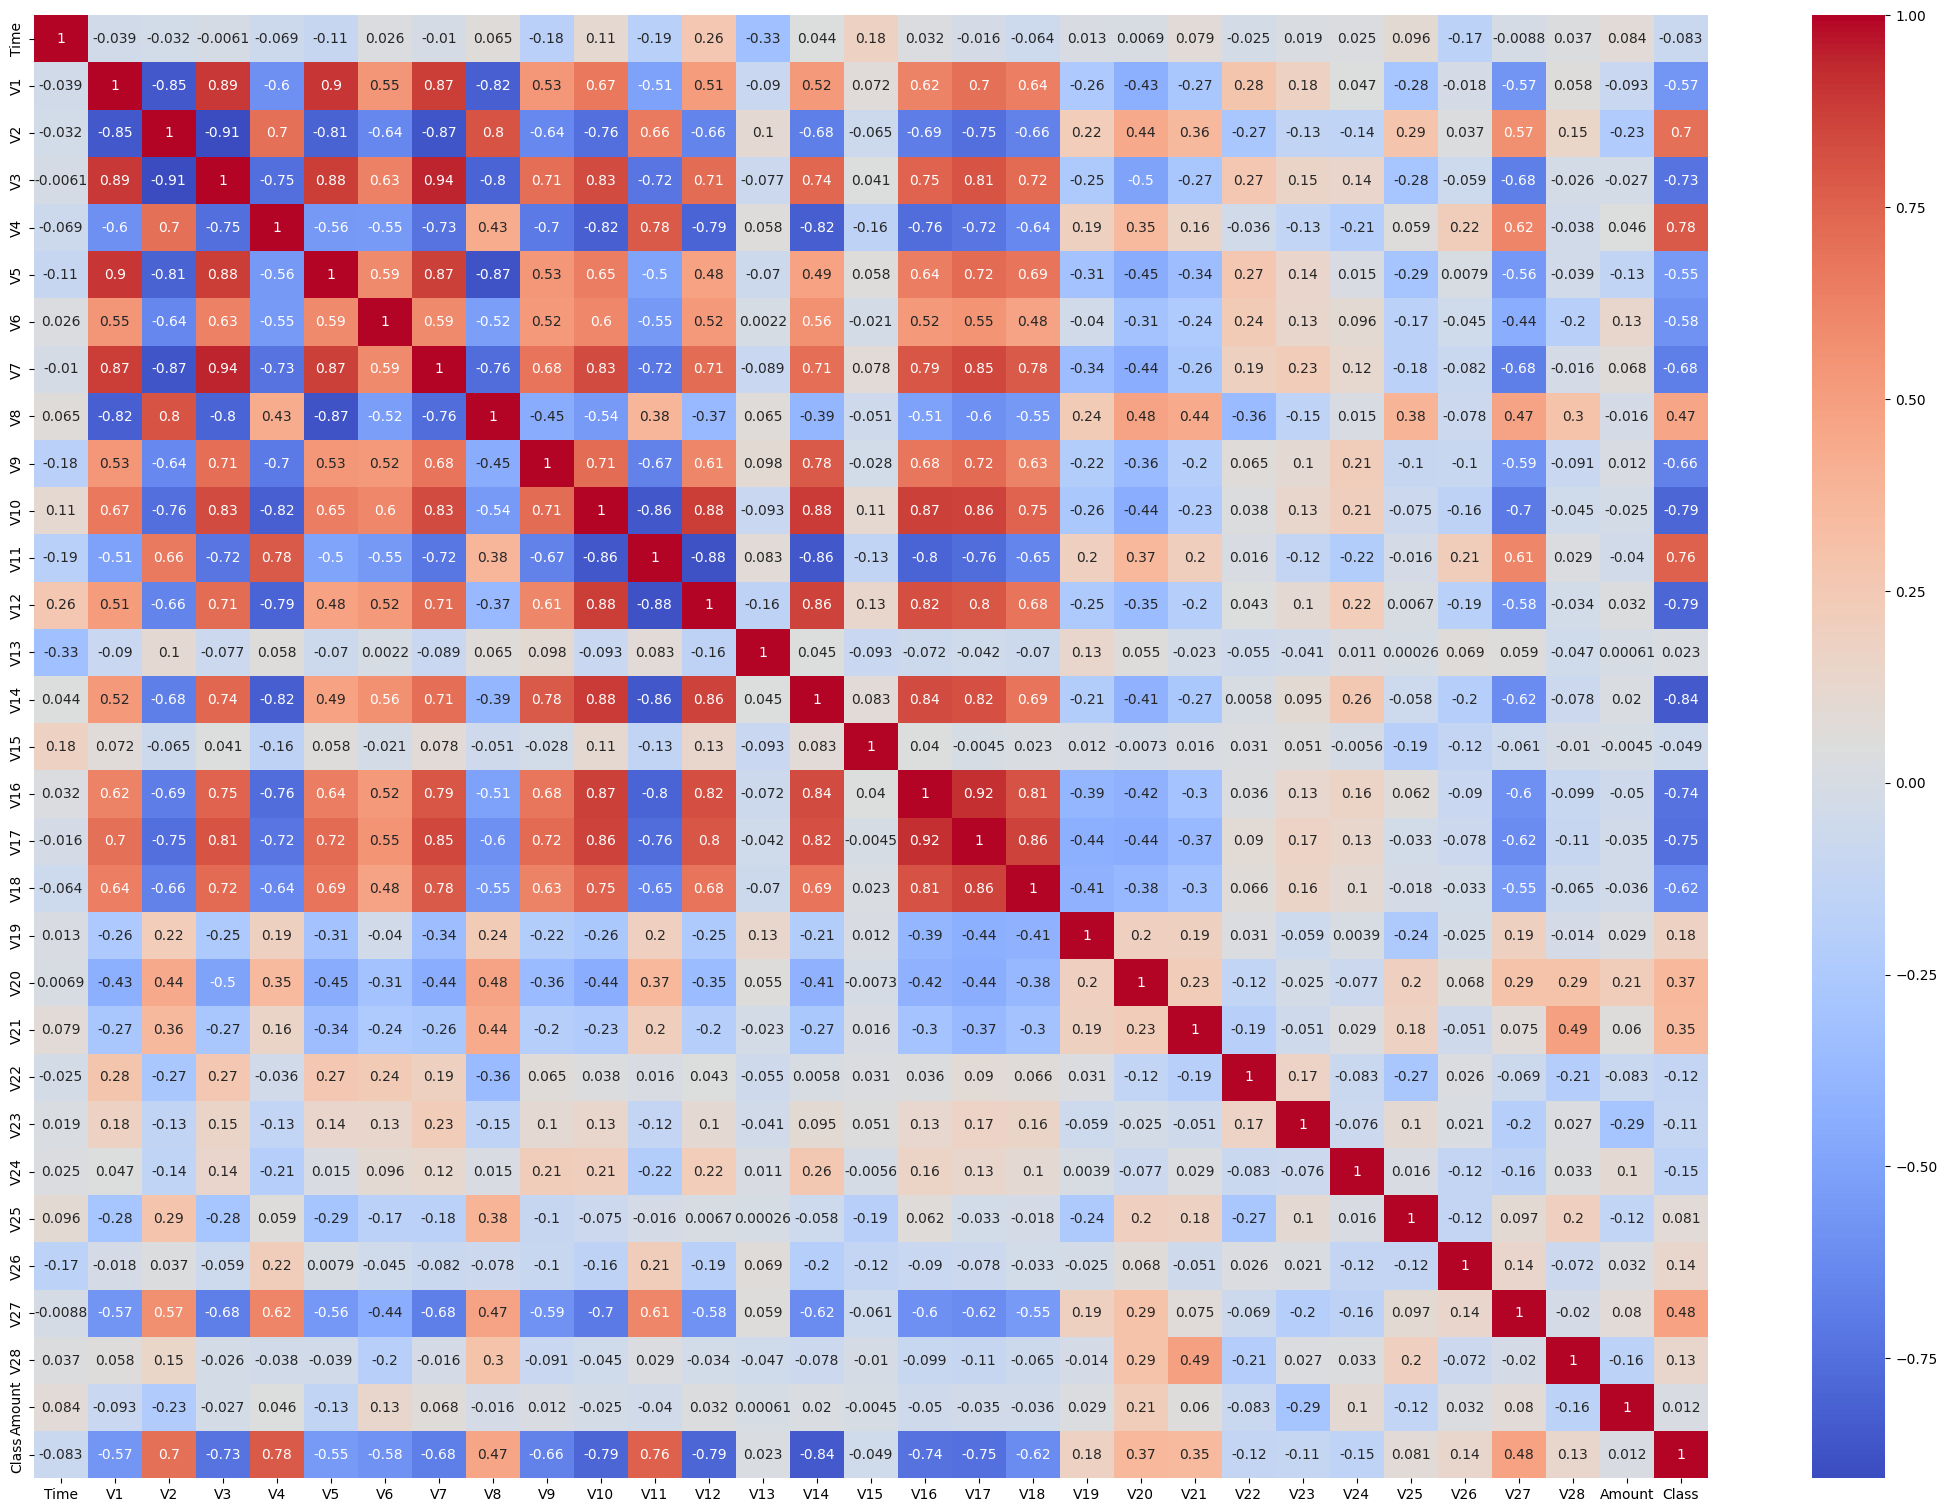

In [25]:
 #plotting the heatmap for the correlation
plt.figure(figsize=(27,19))
sns.heatmap(new_df.corr(), cmap = 'coolwarm', annot= True )
plt.show()

In [26]:
x = new_df.drop(columns='Class',axis=1)
y = new_df['Class']

In [27]:
y

,Class
13140,0.0
4418,0.0
22030,0.0
4944,0.0
9818,0.0
...,...
30398,1.0
30442,1.0
30473,1.0
30496,1.0


In [28]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
13140,23071,1.185983,-0.299135,1.018287,-0.565196,-0.935073,-0.297523,-0.710116,0.006404,3.059797,...,-0.161102,-0.125481,0.159228,-0.007221,0.045117,0.409528,-0.697562,0.083143,0.027950,11.85
4418,3767,-0.310197,-0.006544,0.768549,-1.935041,2.200873,3.483599,-0.488789,0.612529,-0.306156,...,0.452110,-0.279338,-0.727534,-0.172767,0.923539,0.176872,-0.399629,-0.124893,-0.156279,7.09
22030,31993,-0.381271,0.985189,1.217419,-0.218339,0.378739,-0.446117,0.656992,-0.009811,-0.336486,...,0.133980,-0.280025,-0.750255,-0.119785,-0.473978,-0.080252,0.123200,0.263109,0.113292,1.98
4944,4492,0.813421,-0.748426,1.340310,0.640720,-1.525057,-0.637926,-0.455720,-0.174873,2.179720,...,0.323360,-0.107095,-0.260154,-0.041856,0.967640,-0.021689,0.895382,-0.090244,0.050600,200.00
9818,14506,1.145304,-0.153505,0.934851,0.217603,-0.765481,-0.183295,-0.669441,0.116748,1.587171,...,-0.162687,0.016600,0.264969,0.036795,0.217938,0.047980,1.033725,-0.081975,-0.007535,15.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30398,35906,-3.519030,4.140867,-3.628202,5.505672,-4.057463,-0.905945,-6.652031,2.634524,-4.679402,...,0.898723,1.582556,0.778710,-0.135707,-0.004278,0.032706,0.362014,0.900925,0.554897,9.13
30442,35926,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,...,0.757287,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,4.56
30473,35942,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,...,0.579098,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46
30496,35953,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,-5.416284,...,0.284555,1.194888,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,111.70


In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,stratify=y,random_state=15)

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [31]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [33]:
y_train_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train_pred,y_train)
print("Accuracy of training data:", training_data_accuracy*100,"%")

Accuracy of training data: 97.60869565217392 %


In [34]:
y_test_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test_pred,y_test)
print("Accuracy of test data:",test_data_accuracy*100,"%")

Accuracy of test data: 95.65217391304348 %


<ipython-input-35-390720c473f9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[training_data_accuracy*100,test_data_accuracy*100],x=['Train data accuracy','Test data accuracy'],palette='pastel')


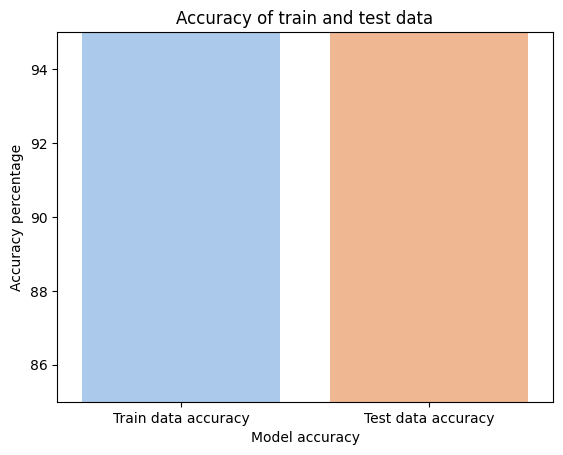

In [35]:
sns.barplot(y=[training_data_accuracy*100,test_data_accuracy*100],x=['Train data accuracy','Test data accuracy'],palette='pastel')
plt.title("Accuracy of train and test data")
plt.ylim(85,95)
plt.xlabel("Model accuracy")
plt.ylabel("Accuracy percentage")
plt.show()

In [36]:
print(confusion_matrix(y_test,y_test_pred))

[[93  2]
 [ 3 17]]


In [37]:
print("Classification report:\n",classification_report(y_test,y_test_pred))

Classification report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97        95
         1.0       0.89      0.85      0.87        20

    accuracy                           0.96       115
   macro avg       0.93      0.91      0.92       115
weighted avg       0.96      0.96      0.96       115

